In [ ]:
from google.colab import files
upload = files.upload()

Saving Crude oil.csv to Crude oil.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import ParameterSampler
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Crude oil.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11-05-2012,85.65,185846.0,84.65,85.90,84.34
2544,11-02-2012,84.86,273619.0,86.91,87.24,84.66
2545,11-01-2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Ensure 'Close/Last' column has a numeric data type
df['Close/Last'] = pd.to_numeric(df['Close/Last'], errors='coerce')

In [ ]:
# Define a range of hyperparameters to test
param_dist = {
    "order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]
}

In [ ]:
# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))

In [ ]:
# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)


In [ ]:
best_aic = np.inf
best_bic = np.inf
best_params = None

In [ ]:
# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []

In [ ]:
# Cross-validation loop
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
# Fit SARIMAX model
sarima = SARIMAX(cv_train['Close/Last'], order=params['order'], seasonal_order=params['seasonal_order'])
sarima_results = sarima.fit()

# Collect AIC and BIC scores
aic_scores.append(sarima_results.aic)
bic_scores.append(sarima_results.bic)

In [ ]:
# Calculate mean AIC and BIC scores
mean_aic = np.mean(aic_scores)
mean_bic = np.mean(bic_scores)


In [ ]:
# Update best parameters if the current model is better
if mean_aic < best_aic and mean_bic < best_bic:
    best_aic = mean_aic
    best_bic = mean_bic
    best_params = params


In [ ]:
# Output the best parameters
print("Best parameters:", best_params)
print("Best AIC:", best_aic)
print("Best BIC:", best_bic)

Best parameters: {'seasonal_order': (0, 1, 0, 12), 'order': (2, 1, 0)}
Best AIC: 10640.146807904935
Best BIC: 10657.11155904848


In [ ]:
# Fit the best model
best_model = SARIMAX(df['Close/Last'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()

In [ ]:
# Extract prediction mean
mean = best_model_fit.get_forecast(steps=len(df['Close/Last'])).predicted_mean

In [ ]:
# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(df['Close/Last'])).conf_int()

In [ ]:
# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0

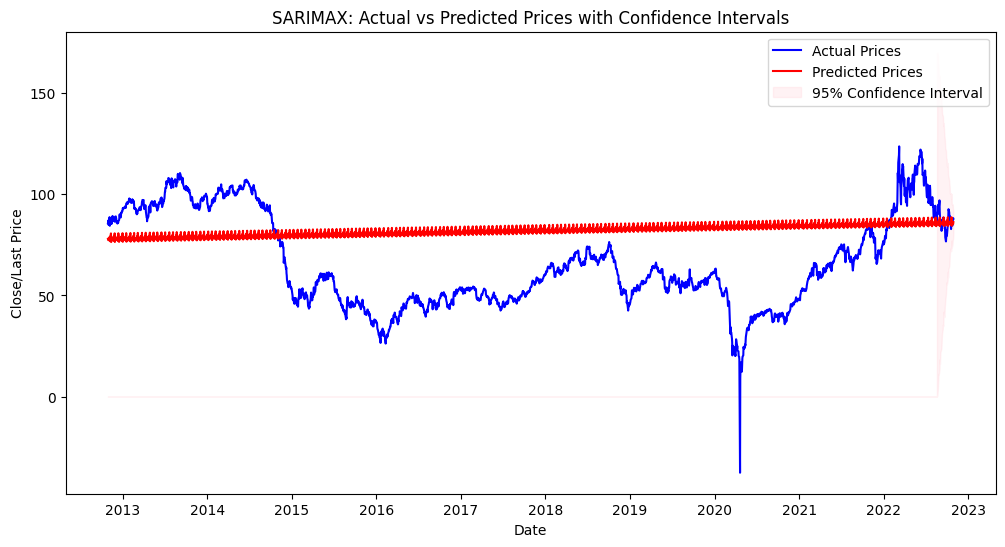

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close/Last'], label='Actual Prices', color='blue')
# Plotting the predicted mean
plt.plot(df.index, mean, label='Predicted Prices', color='red')
# Plotting the confidence intervals
plt.fill_between(df.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2, label='95% Confidence Interval')
# Adding labels and title
plt.title('SARIMAX: Actual vs Predicted Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [ ]:
df = pd.read_csv('Crude oil.csv')

In [ ]:
# Drop specified columns
columns_to_drop = ['Volume', 'Open', 'Low', 'High']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df)

            Date  Close/Last
0     10/28/2022       87.90
1     10/27/2022       88.26
2     10/26/2022       87.91
3     10/25/2022       85.32
4     10/24/2022       84.58
...          ...         ...
2543  11-05-2012       85.65
2544  11-02-2012       84.86
2545  11-01-2012       87.09
2546  10/31/2012       86.24
2547  10/30/2012       85.68

[2548 rows x 2 columns]


In [ ]:
null_values_total = df.isnull().sum()
print(null_values_total)

Date          0
Close/Last    0
dtype: int64


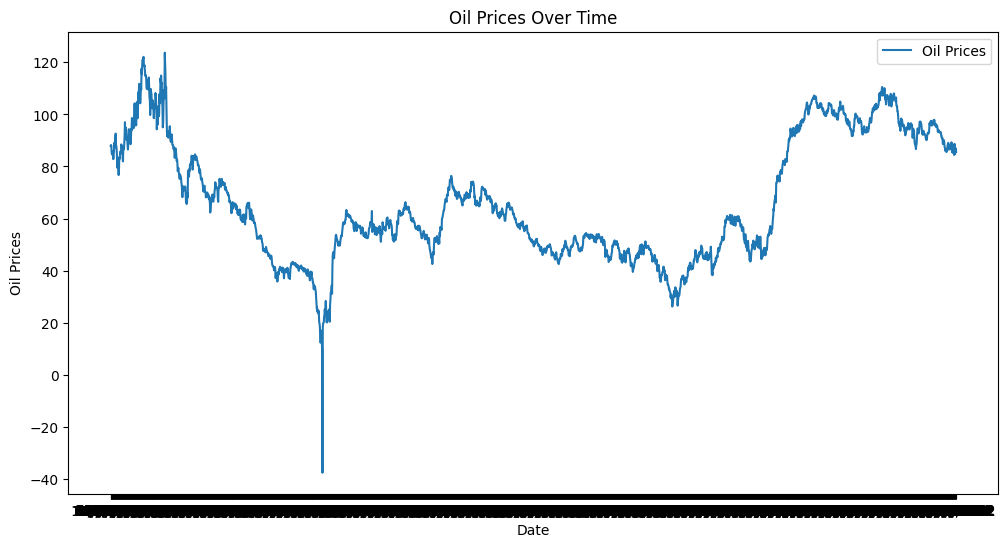

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], label= 'Oil Prices')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Prices')
plt.legend()
plt.show()


In [ ]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display the DataFrame with the 'Date' column as datetime
print(df)

           Date  Close/Last
0    2022-10-28       87.90
1    2022-10-27       88.26
2    2022-10-26       87.91
3    2022-10-25       85.32
4    2022-10-24       84.58
...         ...         ...
2543 2012-11-05       85.65
2544 2012-11-02       84.86
2545 2012-11-01       87.09
2546 2012-10-31       86.24
2547 2012-10-30       85.68

[2548 rows x 2 columns]


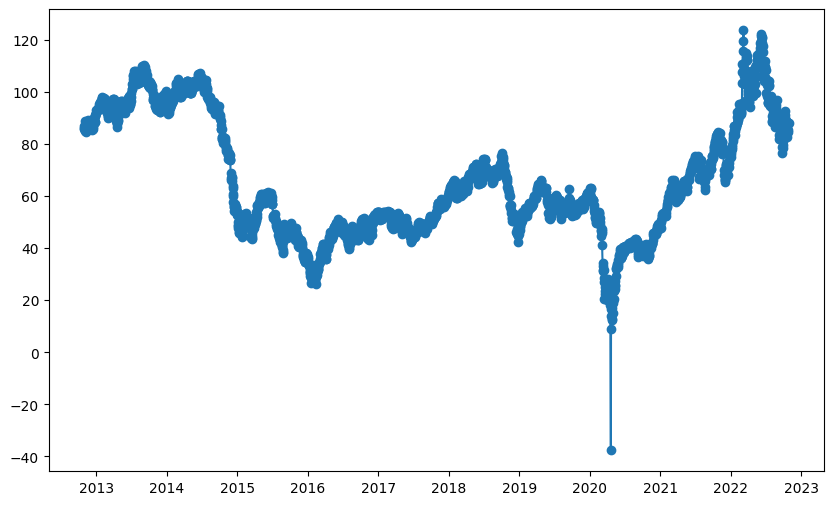

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close/Last'], marker='o', linestyle='-')

Spliting the data

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Seasonal Arima Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
order = (1, 1, 0)  # Replace with appropriate order values
seasonal_order = (1, 1, 0,12)  # Replace with appropriate seasonal_order values
model = SARIMAX(train['Close/Last'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [ ]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)

In [ ]:
rmse_Sarima_12 = sqrt(mean_squared_error(test['Close/Last'], predictions))
print(f'RMSE: {rmse_Sarima_12}')

RMSE: 47.08937569258061


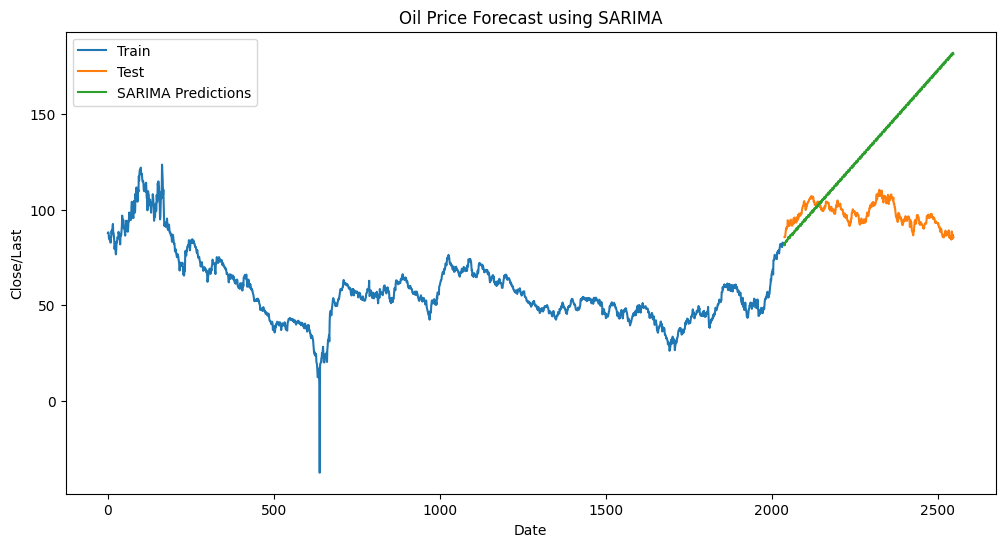

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close/Last'], label='Train')
plt.plot(test.index, test['Close/Last'], label='Test')
plt.plot(test.index, predictions, label='SARIMA Predictions')
plt.title('Oil Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend()
plt.show()

# Arima Model

In [ ]:
# ARIMA Model
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    Train_size = int(len(X) * 0.50)
    Train, Test = X[0:Train_size], X[Train_size:]
    history = [x for x in Train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse_Arima = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
rmse

11.201549249555704

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
forecast = model_fit.forecast(steps=len(test))
forecast

2038     82.661590
2039     81.447599
2040     82.649063
2041     83.013694
2042     83.323650
           ...    
2543    180.797043
2544    181.475868
2545    181.726192
2546    182.284353
2547    181.623235
Name: predicted_mean, Length: 510, dtype: float64

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [ ]:
order = (1, 1, 0)
seasonal_order = (1, 1, 1, 4)
model = SARIMAX(train['Close/Last'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [ ]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)


In [ ]:
rmse_Arima = sqrt(mean_squared_error(test['Close/Last'], predictions))
print(f'RMSE: {rmse_Arima}')

RMSE: 11.410134619035919


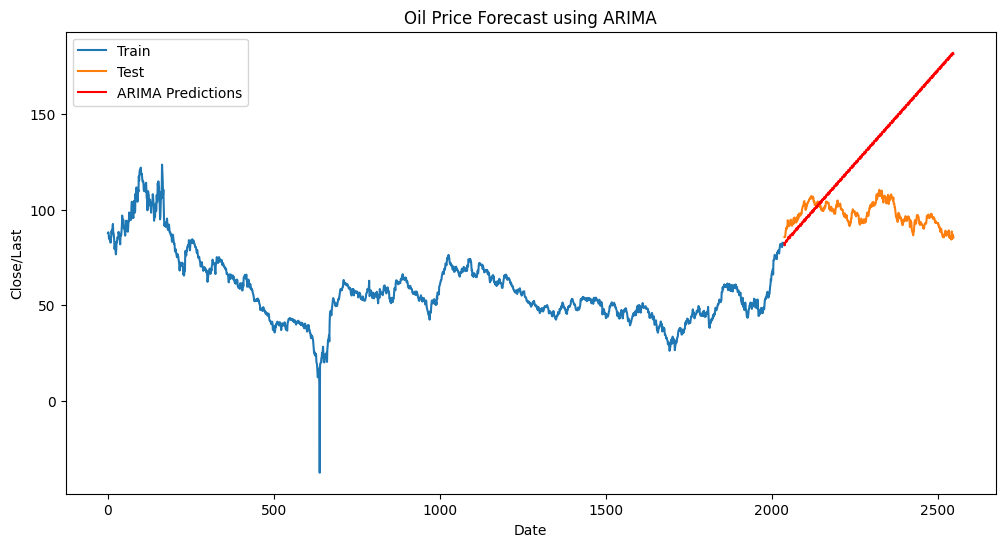

In [ ]:
import matplotlib.pyplot as plt
# Plotting ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close/Last'], label='Train')
plt.plot(test.index, test['Close/Last'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Predictions', color='red')  # Use the forecast values from ARIMA
plt.title('Oil Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend()
plt.show()

# LST Model

In [ ]:
# LSTM Model

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
data = df['Close/Last'].values.reshape(-1, 1)


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [ ]:
# Function to create time series dataset
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Create time series dataset with a time window (time_steps)
time_steps = 30
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [ ]:
# Reshape the input data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
63/63 [==============================] - 4s 25ms/step - loss: 0.0233
Epoch 2/10
63/63 [==============================] - 1s 20ms/step - loss: 9.4872e-04
Epoch 3/10
63/63 [==============================] - 1s 21ms/step - loss: 6.3489e-04
Epoch 4/10
63/63 [==============================] - 1s 20ms/step - loss: 6.0667e-04
Epoch 5/10
63/63 [==============================] - 1s 20ms/step - loss: 5.7639e-04
Epoch 6/10
63/63 [==============================] - 1s 20ms/step - loss: 5.6468e-04
Epoch 7/10
63/63 [==============================] - 1s 18ms/step - loss: 5.8054e-04
Epoch 8/10
63/63 [==============================] - 1s 18ms/step - loss: 5.4409e-04
Epoch 9/10
63/63 [==============================] - 1s 22ms/step - loss: 5.2552e-04
Epoch 10/10
63/63 [==============================] - 1s 21ms/step - loss: 5.0473e-04


In [ ]:
# Generate predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [ ]:
# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


In [ ]:
# Evaluate the model
rmse_LSTM = np.sqrt(np.mean(np.square(train_predict - y_train)))
rmse_test = np.sqrt(np.mean(np.square(test_predict - y_test)))
print(f'Training RMSE: {rmse_LSTM}')
print(f'Testing RMSE: {rmse_test}')

Training RMSE: 25.017900999793188
Testing RMSE: 7.9873070441832965


In [ ]:
# Plot the results
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

In [ ]:
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(scaled_data), :] = test_predict

In [ ]:
# Invert the scaling for original plot
train_plot = scaler.inverse_transform(train_plot)
test_plot = scaler.inverse_transform(test_plot)

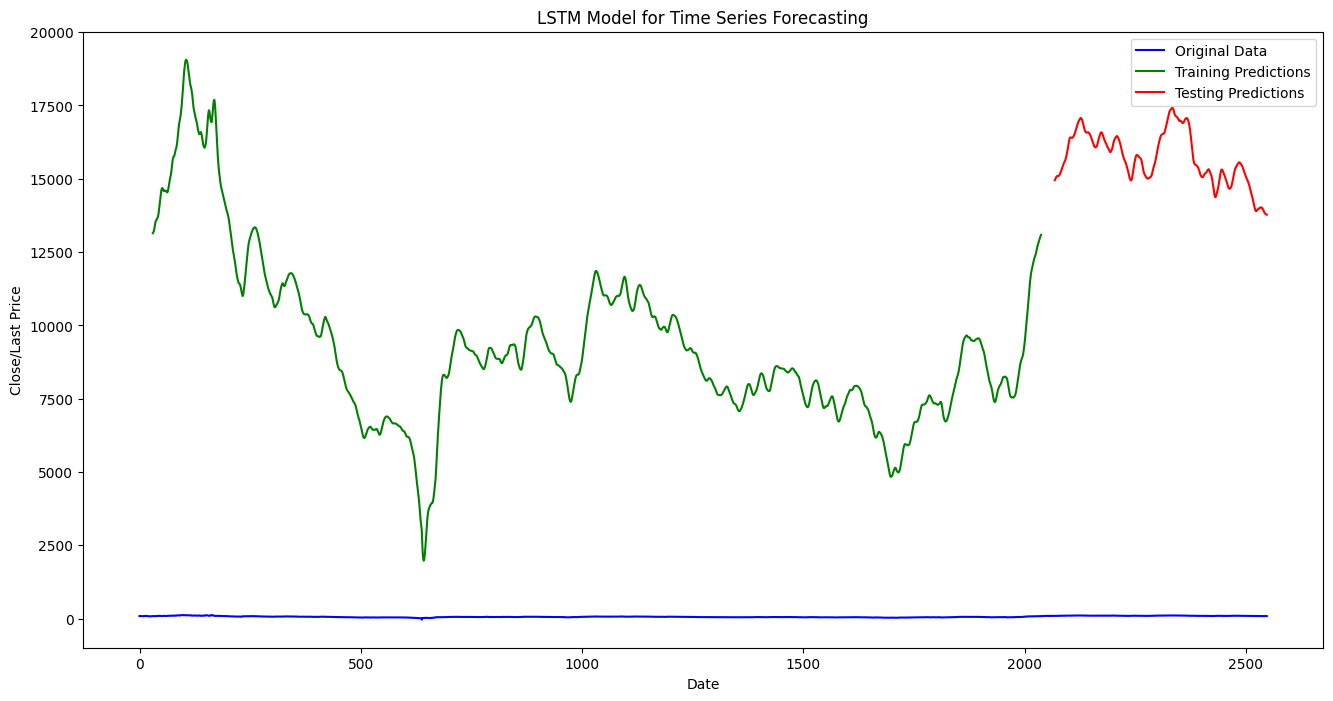

In [ ]:
# Plotting the results
plt.figure(figsize=(16, 8))
plt.plot(df.index, data, label='Original Data', color='blue')
plt.plot(df.index[time_steps:len(train_predict)+time_steps], train_plot[time_steps:len(train_predict)+time_steps], label='Training Predictions', color='green')
plt.plot(df.index[len(train_predict)+(time_steps*2):len(scaled_data)], test_plot[len(train_predict)+(time_steps*2):len(scaled_data)], label='Testing Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('LSTM Model for Time Series Forecasting')
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv("Crude oil.csv")
data

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11-05-2012,85.65,185846.0,84.65,85.90,84.34
2544,11-02-2012,84.86,273619.0,86.91,87.24,84.66
2545,11-01-2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [ ]:
## Cleaning up the data
data.columns=["Date",	"Price",'Volume','Open','High','Low']
data.head()
data['Date'] = pd.to_datetime(data['Date'])
data=data[["Date",	"Price"]]
data.head()
data.dropna()

,Date,Price
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [ ]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Price'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(data['Price'])

ADF Test Statistic : -1.6311397654314364
p-value : 0.46689417081931894
#Lags Used : 3
Number of Observations Used : 2544
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [ ]:
data['Price First Difference'] = data['Price'] - data['Price'].shift(60)

In [ ]:
## Again test dickey fuller test
adfuller_test(data['Price First Difference'].dropna())

ADF Test Statistic : -5.535032474860812
p-value : 1.7525514204195237e-06
#Lags Used : 17
Number of Observations Used : 2470
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
data.dropna()

,Date,Price,Price First Difference
60,2022-08-04,88.54,0.64
61,2022-08-03,90.66,2.40
62,2022-08-02,94.42,6.51
63,2022-08-01,93.89,8.57
64,2022-07-29,98.62,14.04
...,...,...,...
2543,2012-11-05,85.65,-10.79
2544,2012-11-02,84.86,-11.02
2545,2012-11-01,87.09,-8.86
2546,2012-10-31,86.24,-8.99


In [ ]:
data["Price First Difference"]=data["Price First Difference"].interpolate()

In [ ]:
data=data.reset_index()

data.columns

Index(['index', 'Date', 'Price', 'Price First Difference'], dtype='object')

In [ ]:
data=data.fillna(data.mean())

In [ ]:
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
data

,index,Date,Price,Price First Difference,Days
0,0,2022-10-28,87.90,0.041568,3650
1,1,2022-10-27,88.26,0.041568,3649
2,2,2022-10-26,87.91,0.041568,3648
3,3,2022-10-25,85.32,0.041568,3647
4,4,2022-10-24,84.58,0.041568,3646
...,...,...,...,...,...
2543,2543,2012-11-05,85.65,-10.790000,6
2544,2544,2012-11-02,84.86,-11.020000,3
2545,2545,2012-11-01,87.09,-8.860000,2
2546,2546,2012-10-31,86.24,-8.990000,1


In [ ]:
data = data.drop('index', axis=1)

In [ ]:
data['Month']=data.Date.dt.strftime("%b")
data['Year']=data.Date.dt.strftime("%Y")
data.columns=["Date",	"Price",'Price First Difference','Days','Month',"Year"]
data.head()

,Date,Price,Price First Difference,Days,Month,Year
0,2022-10-28,87.90,0.041568,3650,Oct,2022
1,2022-10-27,88.26,0.041568,3649,Oct,2022
2,2022-10-26,87.91,0.041568,3648,Oct,2022
3,2022-10-25,85.32,0.041568,3647,Oct,2022
4,2022-10-24,84.58,0.041568,3646,Oct,2022


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2548 non-null   datetime64[ns]
 1   Price                   2548 non-null   float64       
 2   Price First Difference  2548 non-null   float64       
 3   Days                    2548 non-null   int64         
 4   Month                   2548 non-null   object        
 5   Year                    2548 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 119.6+ KB


In [ ]:
data["t"]=np.arange(1,len(data)+1)
data["t_sqrd"]=np.square(data.t)
data["Log"]=np.log(data.Price)
MONTH=pd.get_dummies(data["Month"])
data

,Date,Price,Price First Difference,Days,Month,Year,t,t_sqrd,Log
0,2022-10-28,87.90,0.041568,3650,Oct,2022,1,1,4.476200
1,2022-10-27,88.26,0.041568,3649,Oct,2022,2,4,4.480287
2,2022-10-26,87.91,0.041568,3648,Oct,2022,3,9,4.476314
3,2022-10-25,85.32,0.041568,3647,Oct,2022,4,16,4.446409
4,2022-10-24,84.58,0.041568,3646,Oct,2022,5,25,4.437698
...,...,...,...,...,...,...,...,...,...
2543,2012-11-05,85.65,-10.790000,6,Nov,2012,2544,6471936,4.450269
2544,2012-11-02,84.86,-11.020000,3,Nov,2012,2545,6477025,4.441003
2545,2012-11-01,87.09,-8.860000,2,Nov,2012,2546,6482116,4.466942
2546,2012-10-31,86.24,-8.990000,1,Oct,2012,2547,6487209,4.457134


In [ ]:
MONTHS=MONTH[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [ ]:
newdata=data.copy()
newdata=pd.concat([data,MONTHS],axis=1)
newdata.reset_index(drop=False,inplace=True)
newdata.shape

(2548, 22)

In [ ]:
TRN=newdata.head(400)
TST=newdata.tail(69)

# Exponential model

In [ ]:
exp=ols("Log~t",data=TRN).fit()
predexponential=pd.Series(exp.predict(pd.DataFrame(TST['t'])))
rmse_Exp=np.sqrt((np.mean(np.array(TST['Price'])-np.array(np.exp(predexponential)))**2))
rmse_Exp

85.08468369967765

In [ ]:
predexponentialdf=pd.DataFrame(columns=['Price'],index=TST['Date'])
predexponentialdf['Price']=predexponential.values
predexponentialdf

,Price
Date,
2013-02-01,1.635825
2013-01-31,1.634603
2013-01-30,1.633381
2013-01-29,1.632158
2013-01-28,1.630936
...,...
2012-11-05,1.557601
2012-11-02,1.556379
2012-11-01,1.555157


In [ ]:
exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     545.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           1.47e-76
Time:                        07:34:57   Log-Likelihood:                 278.53
No. Observations:                 400   AIC:                            -553.1
Df Residuals:                     398   BIC:                            -545.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6670      0.012    385.280      0.000       4.643       4.691
t             -0.0012   5.24e-05    -23.346      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.394   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.210
Skew:                           0.204   Prob(JB):                        0.122
Kurtosis:                       2.706   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Quadratic model

In [ ]:
qdmodel=ols('Log~t+t_sqrd',data=TRN).fit()
predqd=pd.Series(qdmodel.predict(pd.DataFrame(TST[['t','t_sqrd']])))
rmse_Qd=np.sqrt((np.mean(np.array(TST['Price'])-np.array(predqd))**2))
rmse_Qd

116.16983145440734

In [ ]:
predqddf=pd.DataFrame(columns=['Price'],index=TST['Date'])
predqddf['Price']=predqd.values
predqddf

,Price
Date,
2013-02-01,-25.303634
2013-01-31,-25.328558
2013-01-30,-25.353493
2013-01-29,-25.378439
2013-01-28,-25.403394
...,...
2012-11-05,-26.919762
2012-11-02,-26.945352
2012-11-01,-26.970952


In [ ]:
qdmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     440.7
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.54e-101
Time:                        07:35:47   Log-Likelihood:                 339.88
No. Observations:                 400   AIC:                            -673.8
Df Residuals:                     397   BIC:                            -661.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5273      0.016    289.199      0.000       4.497       4.558
t              0.0009      0.000      4.782      0.000       0.001       0.001
t_sqrd     -5.198e-06   4.35e-07    -11.939      0.000   -6.05e-06   -4.34e-06
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.400
Skew:                           0.030   Prob(JB):                        0.819
Kurtosis:                       2.857   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Holt's Exponential Smoothing

In [ ]:
df = pd.read_csv("Crude oil.csv")
df.columns=["Date",	"Price",'Volume','Open','High','Low']
df['Date'] = pd.to_datetime(df['Date'])
df=data[["Date",	"Price"]]
df.head()
df.dropna()


,Date,Price
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(train['Price'], seasonal='add', seasonal_periods=12)
fit_model = model.fit()

In [ ]:
# Make predictions on the test set
predictions = fit_model.forecast(len(test))

In [ ]:
# Calculate RMSE
rmse_Holts = sqrt(mean_squared_error(test['Price'], predictions))
print(f'RMSE: {rmse_Holts}')

RMSE: 16.696001067609597


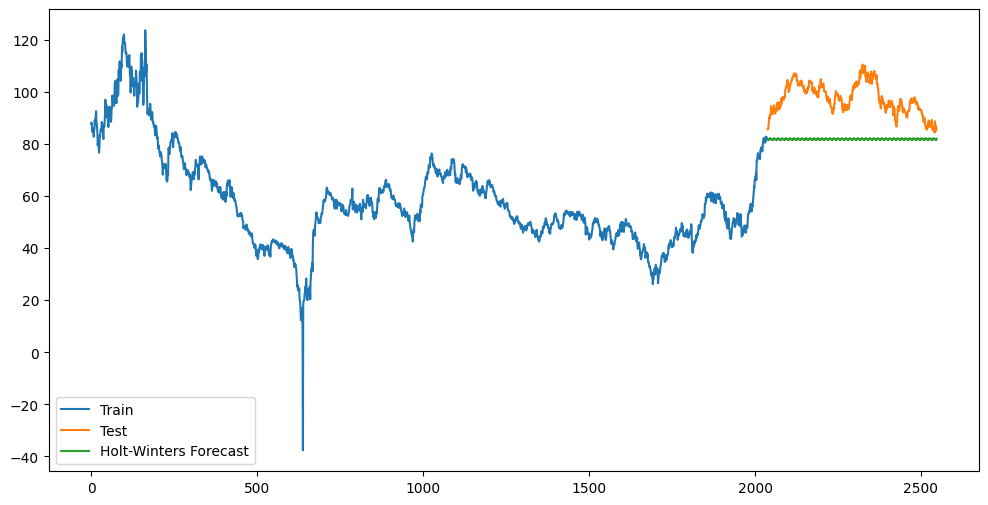

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(predictions, label='Holt-Winters Forecast')
plt.legend()
plt.show()

In [ ]:
# Tabulate RMSEs
df_rmse = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Quadratic', 'Exponential', 'LSTM','Holt_Expo'],
    'RMSE': [rmse_Arima, rmse_Sarima, rmse_Qd, rmse_Exp, rmse_LSTM,rmse_Holts]
})


In [ ]:
df_rmse

,Model,RMSE
0,ARIMA,11.410135
1,SARIMA,47.089376
2,Quadratic,116.169831
3,Exponential,85.084684
4,LSTM,25.017901
5,Holt_Expo,16.696001


In [ ]:
df_rmse = df_rmse.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print(df_rmse)

         Model        RMSE
0        ARIMA   11.410135
1    Holt_Expo   16.696001
2         LSTM   25.017901
3       SARIMA   47.089376
4  Exponential   85.084684
5    Quadratic  116.169831
